In [28]:
from imageio import imread
import os
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd

In [29]:
def load_and_flatten_image(imagePath, width, height):
    image = imread(imagePath)
    #small_image = resize(image, (11, 20))
    image_single_channel = image[:,:,0]
    small_image = cv2.resize(image_single_channel, (width, height))
    image_array = small_image.flatten()
    return image_array

In [30]:
path = "classificatie"
width = 20
height = 11
cpt = sum([len(files) for r, d, files in os.walk(path)])
data_array = np.empty([cpt, height*width], dtype=np.uint8)
label_array = np.empty([cpt], dtype=np.str_)
counter = 0
for root, dirs, files in os.walk(path):
    for dirname in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(path, dirname)):
            for filename in files2:
                image = load_and_flatten_image(os.path.join(os.path.join(path, dirname), filename), width, height)
                for key, pixel in enumerate(image):
                    data_array[counter][key] = pixel
                label_array[counter] = dirname
                counter += 1

dataset = pd.DataFrame({'label': label_array, 'images': list(data_array)}, columns=['label', 'images'])
dataset.head()

,label,images
0,a,"[109, 128, 128, 94, 104, 102, 126, 54, 74, 92,..."
1,a,"[111, 128, 129, 93, 104, 98, 126, 53, 73, 91, ..."
2,a,"[106, 115, 108, 88, 100, 93, 107, 45, 61, 70, ..."
3,a,"[110, 118, 112, 92, 103, 94, 110, 47, 63, 75, ..."
4,a,"[106, 115, 109, 89, 99, 91, 106, 46, 63, 74, 7..."


In [31]:
for index in range(len(dataset)):
    int_value = "1" if dataset.loc[index,"label"] == "a" else "2" if dataset.loc[index,"label"] == "b" else "3"
    dataset.loc[index,"label"] = int_value
dataset.head()

,label,images
0,1,"[109, 128, 128, 94, 104, 102, 126, 54, 74, 92,..."
1,1,"[111, 128, 129, 93, 104, 98, 126, 53, 73, 91, ..."
2,1,"[106, 115, 108, 88, 100, 93, 107, 45, 61, 70, ..."
3,1,"[110, 118, 112, 92, 103, 94, 110, 47, 63, 75, ..."
4,1,"[106, 115, 109, 89, 99, 91, 106, 46, 63, 74, 7..."


In [32]:
dataset.label = dataset.label.astype(np.uint8)

In [33]:
dataset.label.info

<bound method Series.info of 0       1
1       1
2       1
3       1
4       1
       ..
2635    3
2636    3
2637    3
2638    3
2639    3
Name: label, Length: 2640, dtype: uint8>

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tel = 0
for train_index, test_index in split.split(dataset, dataset["label"]):
    tel += 1
    print(tel)
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

1


In [35]:
X_train, y_train = strat_train_set["images"], strat_train_set["label"]

In [36]:
y_train_n = (y_train == 1)

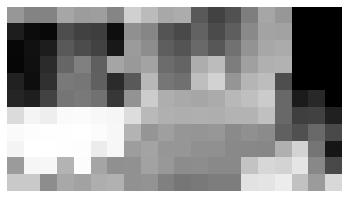

In [37]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
image = X_train[0]


some_digit_image = image.reshape(height, width)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()


In [ ]:
'''
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_n)
'''
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train_n)

In [9]:
X_test, y_test = strat_test_set["images"], strat_test_set["label"]
some_image = X_test[0]
forest_reg.predict([some_image])

ERROR! Session/line number was not unique in database. History logging moved to new session 45


KeyError: 0